# Определение схожести между размерами с помощью коэффициента Жаккара

Если какие-то темы двух размеров имеют коэффициент схожести выше 0,3, они считаются совпадающими. Далее для всех пар размеров считается количество совпадающих тем и строится тепловая карта. 

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict
import re
import csv
from google.colab import files
import os
import pandas as pd
import seaborn as sns

In [ ]:
os.mkdir('/content/corpus')
os.chdir('/content/corpus')
uploaded = files.upload()

Saving 10_topics - strict_max_min.csv to 10_topics - strict_max_min.csv


Создаем функцию для унификации названий размеров

In [ ]:
def universal_names(name):
  name = re.sub('Ямб ', 'Я', name)
  name = re.sub('хорей ', 'Х', name)
  name = re.sub('Анапест ', 'Ан', name)
  name = re.sub('амфибрахий ', 'Ам', name)
  name = re.sub('Дактиль ', 'Д', name)
  return name


Создаем словарь, в котором ключами будут названия размеров, а значениями - списки тем, каждый из которых является списком слов. 

In [ ]:
files = os.listdir()
dict_topics = {}
for f in files:
    with open(f) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        reader = list(reader)
        for row in range(len(reader)):
          if reader[row][0]:
            top = re.search('topic', reader[row][0])
            if top:
              for t in range(10):
                topic = []
                for w in range(1, 11):
                    topic.append(reader[row+w][t])
                dict_topics[meter_name].append(topic)
            elif not reader[row][1]:
              meter_name = reader[row][0]
              if len(meter_name) > 3:
                meter_name = universal_names(meter_name)
              dict_topics.update({meter_name: []})


In [ ]:
from itertools import permutations as perm

Определяем функцию, которая будет считать коэффициент Жаккара

In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

Создаем словарь, в котором будем записывать сколько мы нашли похожих тем между двумя размерами 

In [ ]:
meters = list(dict_topics.keys())
perms = list(perm(meters, 2))

In [ ]:
jac_dict = {}

for p in perms:
  list1 = dict_topics[p[0]]
  list2 = dict_topics[p[1]]
  all_pairs = []
  for i in range(10):
    for j in range(10):
      all_pairs.append([list1[i], list2[j]])
  counter = 0
  for ap in all_pairs:
    jc = jaccard_similarity(ap[0], ap[1])
    if jc > 0.3:
      counter += 1
  check = jac_dict.get(p[0])
  count = float(counter / 10)
  if check:
    jac_dict[p[0]].update({p[1]: count})
  else:
    jac_dict.update({p[0]: {p[1]: count}})
  jac_dict[p[0]].update({p[0]: 1})

jac_dict

{'Ам2': {'Ам2': 1,
  'Ам3': 0.4,
  'Ам4': 0.3,
  'Ам5': 0.1,
  'Ан2': 0.4,
  'Ан3': 0.2,
  'Ан4': 0.1,
  'Ан5': 0.1,
  'Д3': 0.0,
  'Д4': 0.1,
  'Д5': 0.1,
  'Х3': 0.1,
  'Х4': 0.1,
  'Х5': 0.1,
  'Х6': 0.2,
  'Х8': 0.1,
  'Я2': 0.2,
  'Я3': 0.4,
  'Я4': 0.1,
  'Я5': 0.2,
  'Я6': 0.3,
  'Я7': 0.0,
  'Я8': 0.0},
 'Ам3': {'Ам2': 0.4,
  'Ам3': 1,
  'Ам4': 1.0,
  'Ам5': 0.3,
  'Ан2': 0.7,
  'Ан3': 0.5,
  'Ан4': 0.7,
  'Ан5': 0.4,
  'Д3': 0.3,
  'Д4': 0.4,
  'Д5': 0.2,
  'Х3': 0.6,
  'Х4': 0.6,
  'Х5': 0.5,
  'Х6': 0.5,
  'Х8': 0.4,
  'Я2': 0.7,
  'Я3': 0.6,
  'Я4': 0.9,
  'Я5': 0.6,
  'Я6': 0.5,
  'Я7': 0.3,
  'Я8': 0.4},
 'Ам4': {'Ам2': 0.3,
  'Ам3': 1.0,
  'Ам4': 1,
  'Ам5': 0.4,
  'Ан2': 0.5,
  'Ан3': 0.7,
  'Ан4': 0.6,
  'Ан5': 0.3,
  'Д3': 0.5,
  'Д4': 0.4,
  'Д5': 0.2,
  'Х3': 0.6,
  'Х4': 0.6,
  'Х5': 0.6,
  'Х6': 0.7,
  'Х8': 0.3,
  'Я2': 0.5,
  'Я3': 0.6,
  'Я4': 0.6,
  'Я5': 0.6,
  'Я6': 0.3,
  'Я7': 0.2,
  'Я8': 0.0},
 'Ам5': {'Ам2': 0.1,
  'Ам3': 0.3,
  'Ам4': 0.4,
  'Ам5': 1,


In [ ]:
# для сортировки по метрам:
meters = ['Ямб 2', 'Ямб 3', 'Ямб 4', 'Ямб 5', 'Ямб 6', 'Ямб 7', 'Ямб 8',
          'хорей 3', 'хорей 4', 'хорей 5', 'хорей 6', 'хорей 8',
          'Дактиль 3', 'Дактиль 4', 'Дактиль 5',
          'амфибрахий 2', 'амфибрахий 3', 'амфибрахий 4', 'амфибрахий 5',
          'Анапест 2', 'Анапест 3', 'Анапест 4', 'Анапест 5']

# для сортировки по стопам:
meters = ['Ямб 2', 'амфибрахий 2', 'Анапест 2',
          'Ямб 3', 'хорей 3', 'амфибрахий 3', 'Дактиль 3', 'Анапест 3',
          'Ямб 4', 'хорей 4', 'амфибрахий 4', 'Дактиль 4', 'Анапест 4', 
          'Ямб 5', 'хорей 5', 'амфибрахий 5', 'Дактиль 5', 'Анапест 5',
          'Ямб 6', 'хорей 6', 
          'Ямб 7',
          'Ямб 8', 'хорей 8']

# для сортировки по частотности:
meters = 'Я4 Я5 Х4 Ан3 Х5 Ам4 Ан4 Я3 Ам3 Д4 Я6 Ан2 Ан5 Х6 Х3 Д3 Ам5 Х8 Д5 Я7 Ам2 Я2 Я8'
sorted_met_names = meters.split(' ')

sorted_met_names = [re.sub('Ямб ', 'Я', x) for x in meters]
sorted_met_names = [re.sub('хорей ', 'Х', x) for x in sorted_met_names]
sorted_met_names = [re.sub('Анапест ', 'Ан', x) for x in sorted_met_names]
sorted_met_names = [re.sub('амфибрахий ', 'Ам', x) for x in sorted_met_names]
sorted_met_names = [re.sub('Дактиль ', 'Д', x) for x in sorted_met_names]



Записываем коэффициенты схожести в виде таблицы в csv-файл

In [ ]:
with open('jaccard_scores.csv', 'w', encoding='utf-8') as csvfile:
      writer = csv.writer(csvfile, delimiter=',')
      for i in sorted_met_names:
        row = []
        for j in sorted_met_names:
          row.append(jac_dict[i][j])
        writer.writerow(row)

# Визуализация

Определяем параметры будущей визуализации

In [ ]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [ ]:
df = pd.read_csv('jaccard_scores.csv', header=None)
df.columns = sorted_met_names
df

,Я2,Ам2,Ан2,Я3,Х3,Ам3,Д3,Ан3,Я4,Х4,Ам4,Д4,Ан4,Я5,Х5,Ам5,Д5,Ан5,Я6,Х6,Я7,Я8,Х8
0,1.0,0.2,0.6,0.3,0.2,0.7,0.2,0.6,0.6,0.3,0.5,0.2,0.5,0.4,0.4,0.3,0.0,0.1,0.3,0.3,0.2,0.0,0.2
1,0.2,1.0,0.4,0.4,0.1,0.4,0.0,0.2,0.1,0.1,0.3,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.3,0.2,0.0,0.0,0.1
2,0.6,0.4,1.0,0.8,0.4,0.7,0.3,0.7,0.7,0.7,0.5,0.4,0.8,0.8,0.6,0.1,0.1,0.4,0.5,0.4,0.1,0.2,0.3
3,0.3,0.4,0.8,1.0,0.5,0.6,0.2,0.7,0.6,0.6,0.6,0.4,0.4,0.8,0.7,0.4,0.1,0.5,0.6,0.5,0.2,0.1,0.4
4,0.2,0.1,0.4,0.5,1.0,0.6,0.4,0.5,0.5,0.3,0.6,0.5,0.4,0.3,0.4,0.2,0.1,0.1,0.2,0.5,0.4,0.0,0.5
5,0.7,0.4,0.7,0.6,0.6,1.0,0.3,0.5,0.9,0.6,1.0,0.4,0.7,0.6,0.5,0.3,0.2,0.4,0.5,0.5,0.3,0.4,0.4
6,0.2,0.0,0.3,0.2,0.4,0.3,1.0,0.2,0.3,0.2,0.5,0.6,0.2,0.4,0.6,0.3,0.4,0.3,0.4,0.5,0.3,0.1,0.4
7,0.6,0.2,0.7,0.7,0.5,0.5,0.2,1.0,0.9,0.9,0.7,0.4,0.7,0.8,0.7,0.1,0.1,0.4,0.7,0.7,0.2,0.2,0.6
8,0.6,0.1,0.7,0.6,0.5,0.9,0.3,0.9,1.0,0.7,0.6,0.4,0.5,0.8,0.8,0.3,0.1,0.5,0.9,0.6,0.3,0.4,0.4
9,0.3,0.1,0.7,0.6,0.3,0.6,0.2,0.9,0.7,1.0,0.6,0.4,0.6,0.6,0.5,0.2,0.1,0.3,0.6,0.5,0.3,0.2,0.5


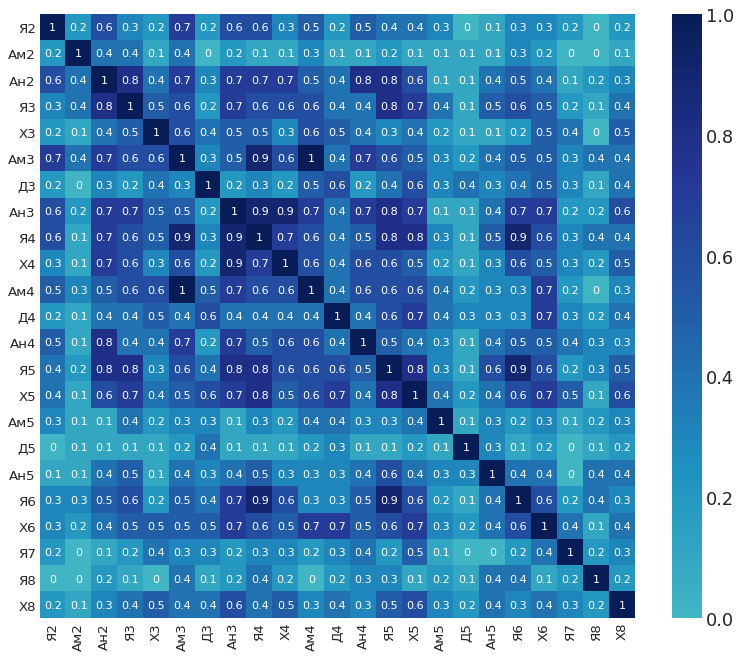

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns, cmap='YlGnBu', center=0, annot=True)

# Decorations
plt.title('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()